In [1]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.layers import Averagepooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [2]:
dataset = r'/content/drive/MyDrive/face_mask_detector/Dataset'
imagePaths=list(paths.list_images(dataset))

In [4]:
print(imagePaths)
imagePaths
print(len(imagePaths))

['/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/augmented_image_197.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/augmented_image_252.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/228-with-mask.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/158-with-mask.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/332-with-mask.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/217-with-mask.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/augmented_image_145.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/295-with-mask.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/augmented_image_90.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/215-with-mask.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/augmented_image_236.jpg', '/content/drive/MyDrive/face_mask_detector/Dataset/with_mask/pra1.jpg', '/conte

In [5]:

data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [6]:
data

[array([[[-0.78039217, -0.7882353 , -0.81960785],
         [-0.78039217, -0.7882353 , -0.81960785],
         [-0.78039217, -0.7882353 , -0.81960785],
         ...,
         [-0.6627451 , -0.6627451 , -0.7254902 ],
         [-0.6627451 , -0.6627451 , -0.7254902 ],
         [-0.6627451 , -0.6627451 , -0.7254902 ]],
 
        [[-0.78039217, -0.7882353 , -0.81960785],
         [-0.78039217, -0.7882353 , -0.81960785],
         [-0.78039217, -0.7882353 , -0.81960785],
         ...,
         [-0.6627451 , -0.6627451 , -0.7254902 ],
         [-0.6627451 , -0.6627451 , -0.7254902 ],
         [-0.6627451 , -0.6627451 , -0.7254902 ]],
 
        [[-0.77254903, -0.78039217, -0.8117647 ],
         [-0.77254903, -0.78039217, -0.8117647 ],
         [-0.77254903, -0.78039217, -0.8117647 ],
         ...,
         [-0.6627451 , -0.6627451 , -0.7254902 ],
         [-0.6627451 , -0.6627451 , -0.7254902 ],
         [-0.6627451 , -0.6627451 , -0.7254902 ]],
 
        ...,
 
        [[-0.3490196 , -0.5921569 

In [7]:
labels

['with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

In [8]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [9]:
data.shape

(1376, 224, 224, 3)

In [10]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [11]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [13]:
train_X.shape

(1100, 224, 224, 3)

In [14]:
train_Y.shape

(1100, 2)

In [15]:
test_X.shape

(276, 224, 224, 3)

In [16]:
test_Y.shape

(276, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [18]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

9412608/9406464 [==============================] - 0s 0us/step


In [19]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [26]:

from tensorflow.keras.layers import AveragePooling2D
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=[7,7])(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [27]:
for layer in baseModel.layers:
    layer.trainable=False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [28]:

learning_rate=0.001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'/content/drive/MyDrive/face_mask_detector/mobilenet_v2.model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
91/91 [==============================] - 55s 563ms/step - loss: 0.2146 - accuracy: 0.9164 - val_loss: 0.0301 - val_accuracy: 0.9928
Epoch 2/20
91/91 [==============================] - 50s 553ms/step - loss: 0.0650 - accuracy: 0.9789 - val_loss: 0.0158 - val_accuracy: 0.9964
Epoch 3/20
91/91 [==============================] - 50s 550ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 4/20
91/91 [==============================] - 50s 550ms/step - loss: 0.0524 - accuracy: 0.9862 - val_loss: 0.0145 - val_accuracy: 0.9964
Epoch 5/20
91/91 [==============================] - 50s 549ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0195 - val_accuracy: 0.9928
Epoch 6/20
91/91 [==============================] - 50s 552ms/step - loss: 0.0342 - accuracy: 0.9871 - val_loss: 0.0127 - val_accuracy: 0.9928
Epoch 7/20
91/91 [==============================] - 50s 549ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0161 - val_accuracy: 0.9928

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/face_mask_detector/mobilenet_v2.model/assets


In [29]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      0.99      0.99       138
without_mask       0.99      1.00      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



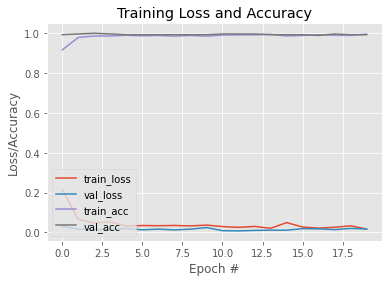

In [30]:
# plot the training loss and accuracy

N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'/content/drive/MyDrive/face_mask_detector/output_plot_v2.png')